In [1]:
import os
os.chdir('/global/homes/l/ltshu/Simulation/Rattle')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core import Structure, Lattice, Molecule
from pymatgen.analysis.structure_matcher import StructureMatcher, ElementComparator
from pymatgen.io.ase import AseAtomsAdaptor

from ase.io import read, write

# Shift rattle method
import shift_rattle

# get the relaxed structure and eng
import atoms_minimize

In [3]:
import sys
sys.path.append('/global/homes/l/ltshu/Simulation/SHGO')
import pot_swkc
import pot_swkc_min

In [4]:
sys.path.append('/global/homes/l/ltshu/Simulation/struc_compare/structurematcher')
import struc_Matcher

## Case1: MoS2/MoSe2 2D bilayer, twisted 4 degrees, totally 540 atoms
### N = 10

In [5]:
at = read('/global/homes/l/ltshu/Simulation/Structures/01-4.00_deg-540_atoms.xyz')

In [6]:
from ase import Atoms

In [7]:
Mo1 = np.array([0.03177610, 1.79521115, 0])
Mo2 = np.array([1.67757683, 4.46886443, 0])
Mo3 = np.array([-1.51868681, 4.50772995, 0])
v1 = Mo2 - Mo1
v2 = Mo3 - Mo1

cell = [list(v1), list(v2), [0, 0, 12]]
positions = [[0.03177610, 1.79521115, 0], [1.61402464, 0.87844212, -1.58592600], [1.61402464, 0.87844212, 1.58592600]]
unit_cell = Atoms('MoS2', positions=positions, cell=cell)

In [8]:
unit_vectors = unit_cell.get_cell()

In [9]:
N = 10
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [10]:
shifted_vectors

[array([0., 0., 0.]),
 array([-0.15504629,  0.27125188,  0.        ]),
 array([-0.31009258,  0.54250376,  0.        ]),
 array([-0.46513887,  0.81375564,  0.        ]),
 array([-0.62018516,  1.08500752,  0.        ]),
 array([-0.77523146,  1.3562594 ,  0.        ]),
 array([-0.93027775,  1.62751128,  0.        ]),
 array([-1.08532404,  1.89876316,  0.        ]),
 array([-1.24037033,  2.17001504,  0.        ]),
 array([-1.39541662,  2.44126692,  0.        ]),
 array([-1.55046291,  2.7125188 ,  0.        ]),
 array([0.16458007, 0.26736533, 0.        ]),
 array([0.00953378, 0.53861721, 0.        ]),
 array([-0.14551251,  0.80986909,  0.        ]),
 array([-0.3005588 ,  1.08112097,  0.        ]),
 array([-0.45560509,  1.35237285,  0.        ]),
 array([-0.61065138,  1.62362473,  0.        ]),
 array([-0.76569767,  1.89487661,  0.        ]),
 array([-0.92074396,  2.16612849,  0.        ]),
 array([-1.07579026,  2.43738037,  0.        ]),
 array([-1.23083655,  2.70863225,  0.        ]),
 arr

In [11]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [12]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


In [13]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

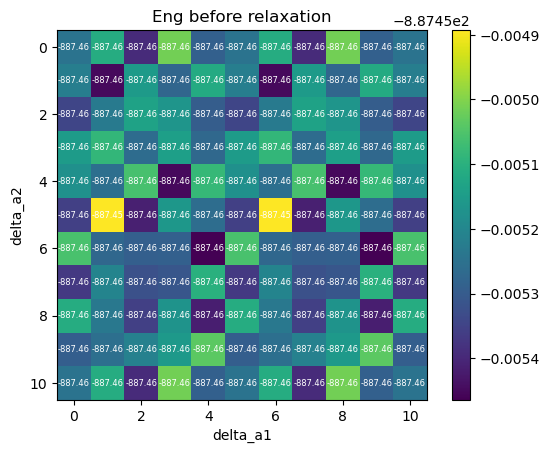

In [23]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix1, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix1):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng before relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

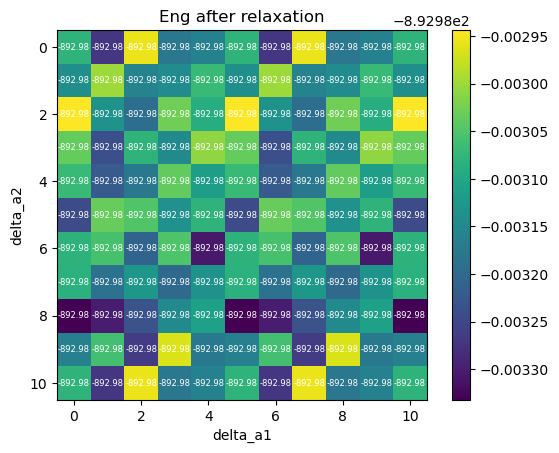

In [24]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix2, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix2):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng after relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

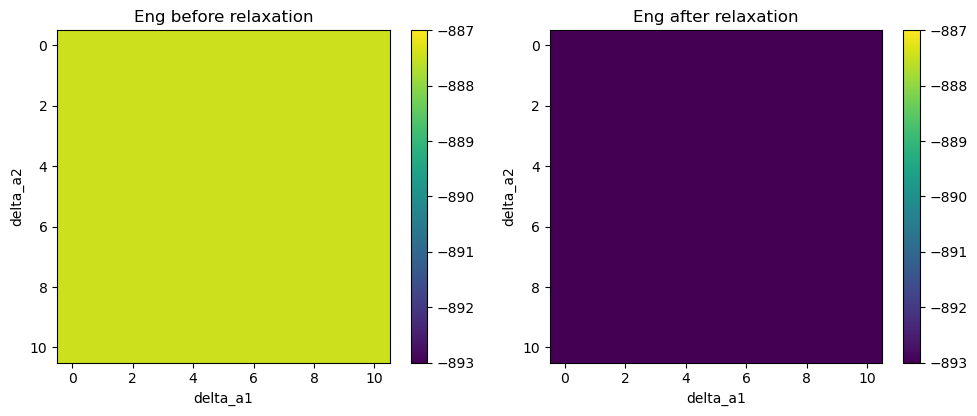

In [14]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', vmin=-893, vmax=-887, interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', vmin=-893, vmax=-887,interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

# 调整布局以防止子图重叠
plt.tight_layout()

# 显示图形
plt.show()

### N = 30

In [10]:
N = 30
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [11]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


In [12]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

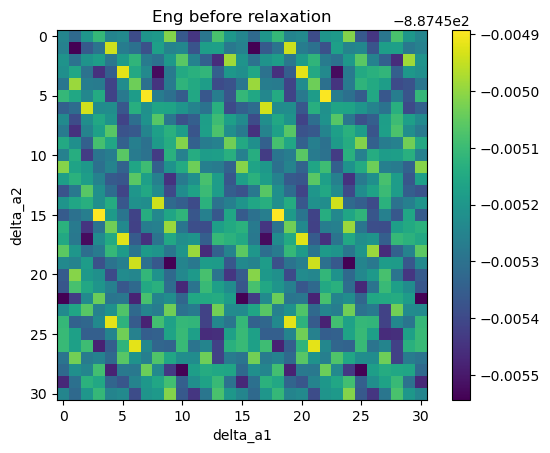

In [13]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix1, cmap='viridis', interpolation='none')

# for (i, j), val in np.ndenumerate(matrix1):
#     ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng before relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

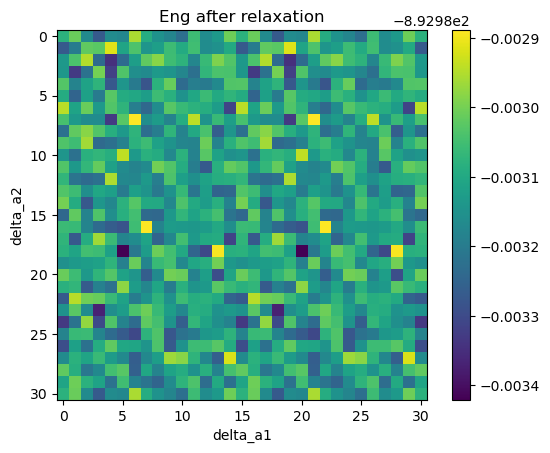

In [14]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix2, cmap='viridis', interpolation='none')

# for (i, j), val in np.ndenumerate(matrix2):
#     ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('Eng after relaxation')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

如果想把在6atoms中得到的结论放在更为复杂的体系当中，就变得很难实施，如果不同的没有连起来的色块都代表了进入了不同的local minimum，那么也很难说继续加细之后会不会出现更多的local，也就是每个块内是不一定只有一个的，甚至会有比图片展现出来的能量更低的local minimum。

例如这里从N=10加细到N=30后就出现了在N=10情况下没表现出来的更低能量的local minima。

但与此同时呢，平均到每一个原子上相差的其实非常非常小的能量差异。相当于这样不均匀之后，不论是relaxation之前还是之后能量差异都很小。

所以规则结构各向异性比较强，更加有规律；越乱的结构差的都不多，但是各向同性。

### Shift along the supercell??

In [5]:
at = read('/global/homes/l/ltshu/Simulation/Structures/01-4.00_deg-540_atoms.xyz')
unit_cell = at.copy()

In [6]:
unit_vectors = unit_cell.get_cell()
unit_vectors

Cell([[36.6140251449011, -8.526211674557569, 0.0], [-21.897156378228708, 27.202919066063554, 0.0], [0.0, 0.0, 19.571784400000002]])

In [7]:
N = 10
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [8]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [9]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


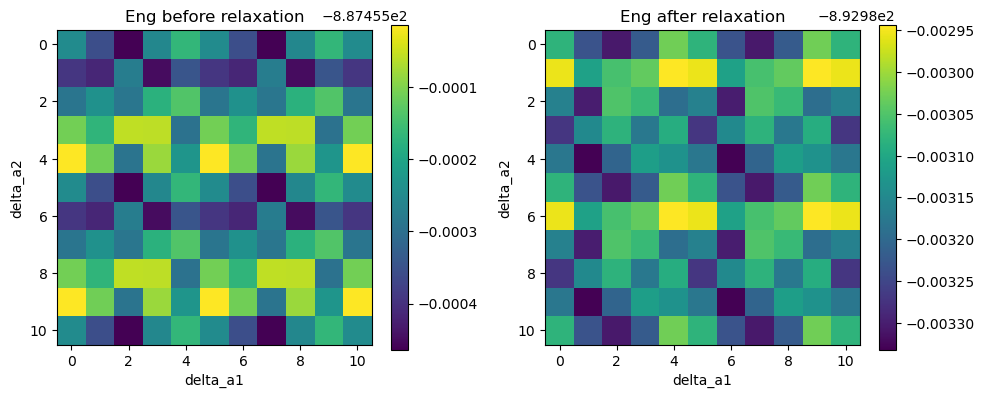

In [10]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

plt.tight_layout()

plt.show()

## Larger

In [5]:
at = read('/global/homes/l/ltshu/Simulation/Structures/MoS2_WSe2-1.42_deg-2937_atoms.xyz', format='extxyz')
unit_cell = read('/global/homes/l/ltshu/Simulation/struc_compare/build_struc/MoS2_monolayer.xyz')
unit_vectors = unit_cell.get_cell()

In [6]:
N = 10
shifted_vectors = [] # totally 

for i in range(0, N+1):
    for j in range(0, N+1):
        shifted_vectors.append(i/N * unit_vectors[0] + j/N * unit_vectors[1])

In [7]:
shifted_vectors

[array([0., 0., 0.]),
 array([-0.1580105 ,  0.27368221,  0.        ]),
 array([-0.316021  ,  0.54736443,  0.        ]),
 array([-0.4740315 ,  0.82104664,  0.        ]),
 array([-0.632042  ,  1.09472886,  0.        ]),
 array([-0.7900525 ,  1.36841107,  0.        ]),
 array([-0.948063  ,  1.64209328,  0.        ]),
 array([-1.1060735,  1.9157755,  0.       ]),
 array([-1.264084  ,  2.18945771,  0.        ]),
 array([-1.4220945 ,  2.46313993,  0.        ]),
 array([-1.580105  ,  2.73682214,  0.        ]),
 array([0.316021, 0.      , 0.      ]),
 array([0.1580105 , 0.27368221, 0.        ]),
 array([1.66533454e-16, 5.47364428e-01, 0.00000000e+00]),
 array([-0.1580105 ,  0.82104664,  0.        ]),
 array([-0.316021  ,  1.09472886,  0.        ]),
 array([-0.4740315 ,  1.36841107,  0.        ]),
 array([-0.632042  ,  1.64209328,  0.        ]),
 array([-0.7900525,  1.9157755,  0.       ]),
 array([-0.948063  ,  2.18945771,  0.        ]),
 array([-1.1060735 ,  2.46313993,  0.        ]),
 array(

In [8]:
import importlib
importlib.reload(pot_swkc)
importlib.reload(pot_swkc_min)

<module 'pot_swkc_min' from '/global/homes/l/ltshu/Simulation/SHGO/pot_swkc_min.py'>

In [9]:
shifted_relaxed_engs = []
shifted_unrelaxed_engs = []
for i in range(0, len(shifted_vectors)):
    shifted_vector = shifted_vectors[i]
    shifted_struc = shift_rattle.Shift_rattle(at, unit_cell, shifted_vector)
    
    # relaxed = atoms_minimize.Atoms_minimize(shifted_struc)
    # eng = relaxed[1]
    unrelaxed_eng = pot_swkc.Pot_swkc(shifted_struc)
    relaxed_eng = pot_swkc_min.Pot_swkc(shifted_struc)

    shifted_unrelaxed_engs.append(unrelaxed_eng)
    shifted_relaxed_engs.append(relaxed_eng)

/global/homes/l/ltshu/.local/perlmutter/python-3.11/lib/python3.11/site-packages/nequip/__init__.py:20: UserWarning: !! PyTorch version 2.3.1+cu121 found. Upstream issues in PyTorch versions 1.13.* and 2.* have been seen to cause unusual performance degredations on some CUDA systems that become worse over time; see https://github.com/mir-group/nequip/discussions/311. The best tested PyTorch version to use with CUDA devices is 1.11; while using other versions if you observe this problem, an unexpected lack of this problem, or other strange behavior, please post in the linked GitHub issue.
  warnings.warn(


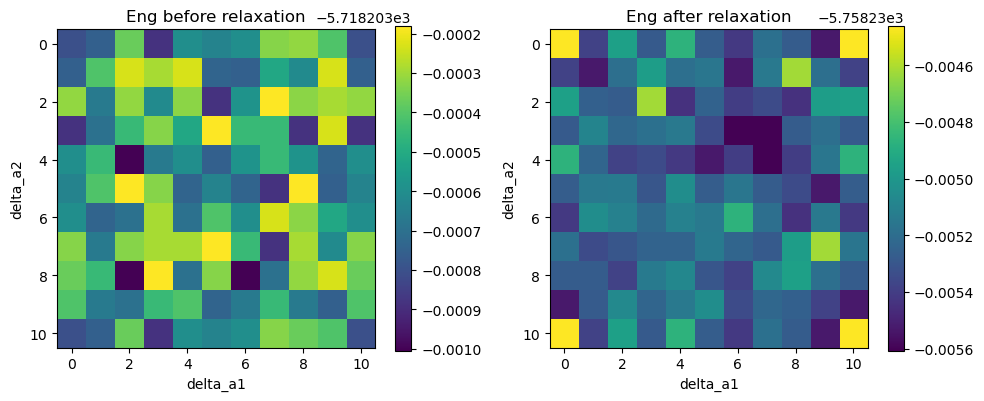

In [10]:
matrix1 = np.reshape(shifted_unrelaxed_engs, (N+1, N+1))
matrix2 = np.reshape(shifted_relaxed_engs, (N+1, N+1))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
cax1 = axs[0].imshow(matrix1, cmap='viridis', interpolation='none')
fig.colorbar(cax1)
axs[0].set_title('Eng before relaxation')
axs[0].set_xlabel('delta_a1')
axs[0].set_ylabel('delta_a2')

cax2 = axs[1].imshow(matrix2, cmap='viridis', interpolation='none')
fig.colorbar(cax2)
axs[1].set_title('Eng after relaxation')
axs[1].set_xlabel('delta_a1')
axs[1].set_ylabel('delta_a2')

plt.tight_layout()

plt.show()

### 局部打乱AA结构
turn AA to AB

In [16]:
at = read('/global/homes/l/ltshu/Simulation/Structures/01-4.00_deg-540_atoms.xyz')
xs = []
ys = []
pos = at.positions
for i in range(0, len(pos)):
    xs.append(pos[i][0])
    ys.append(pos[i][1])
xmin = np.min(xs)
xmax = np.max(xs)

ymin = np.min(ys)
ymax = np.max(ys)

In [17]:
from ase import Atoms
Mo1 = np.array([0.03177610, 1.79521115, 0])
Mo2 = np.array([1.67757683, 4.46886443, 0])
Mo3 = np.array([-1.51868681, 4.50772995, 0])
v1 = Mo2 - Mo1
v2 = Mo3 - Mo1

cell = [list(v1), list(v2), [0, 0, 12]]
positions = [[0.03177610, 1.79521115, 0], [1.61402464, 0.87844212, -1.58592600], [1.61402464, 0.87844212, 1.58592600]]
unit_cell = Atoms('MoS2', positions=positions, cell=cell)
unit_vectors = unit_cell.get_cell()
unit_vectors

Cell([[1.64580073, 2.67365328, 0.0], [-1.55046291, 2.7125188, 0.0], [0.0, 0.0, 12.0]])

In [18]:
at_new = at.copy()
pos_new = pos.copy()
import random
for i in range(0, len(pos)):
    if (pos_new[i][0] < (2/5) * xmax + (1/2) * xmin) and (pos_new[i][2] < 3):
        pos_new[i] +=  (1/10) * unit_vectors[1]
    elif (pos_new[i][0] > (2/5) * xmax + (1/2) * xmin) and (pos_new[i][2] < 3):
        pos_new[i] += (1/13) * unit_vectors[2] 
    elif (pos_new[i][0] < (2/5) * xmax + (1/2) * xmin) and (pos_new[i][2] > 3):
        pos_new[i] -= (1/10) * unit_vectors[1]
    elif (pos_new[i][0] > (2/5) * xmax + (1/2) * xmin) and (pos_new[i][2] > 3):
        pos_new[i] -= (1/12) * unit_vectors[2]
    
    

at_new.set_positions(pos_new)

In [19]:
write('hhhh.xyz', at_new)

In [20]:
eng1 = pot_swkc.Pot_swkc(at_new)
eng2 = pot_swkc_min.Pot_swkc(at_new)
print(eng1, eng2)

Exception: ERROR on proc 0: Non-numeric atom coords - simulation unstable (src/src/OPENMP/domain_omp.cpp:58)
L